**Intuition**  
* CART: Classification And Regression Trees  
* Focus on Regression trees this task - more complicated.
* Makes split based on information entropy.  
* Splits are called leaves.  
* Final leaves are called terminal leaves.  
* Regression:  Take average dependent value for final leaf that predicted value falls in.  

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


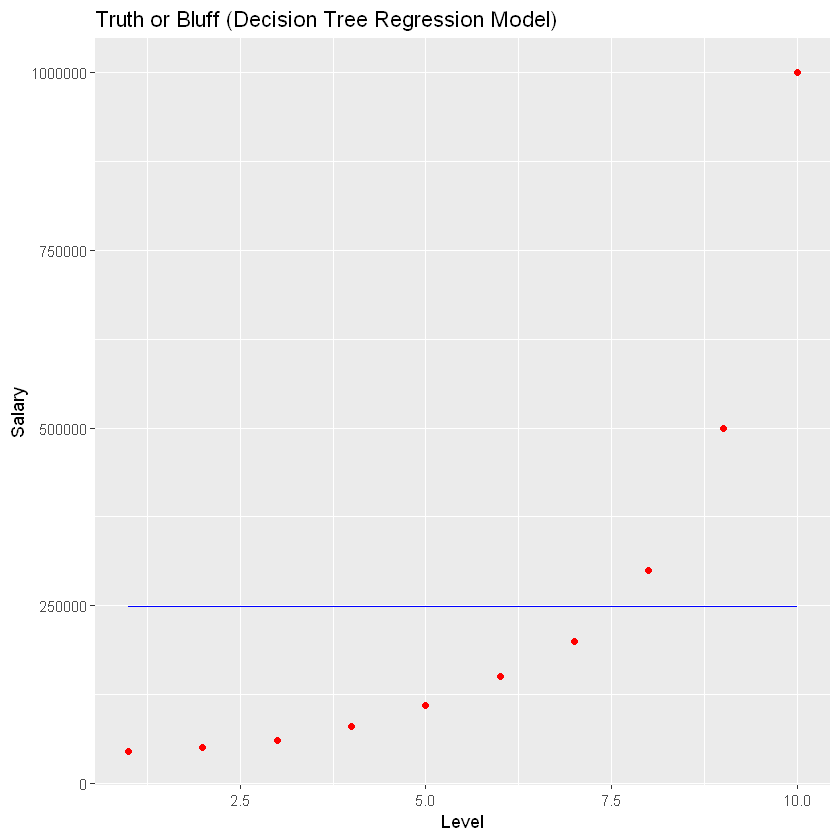

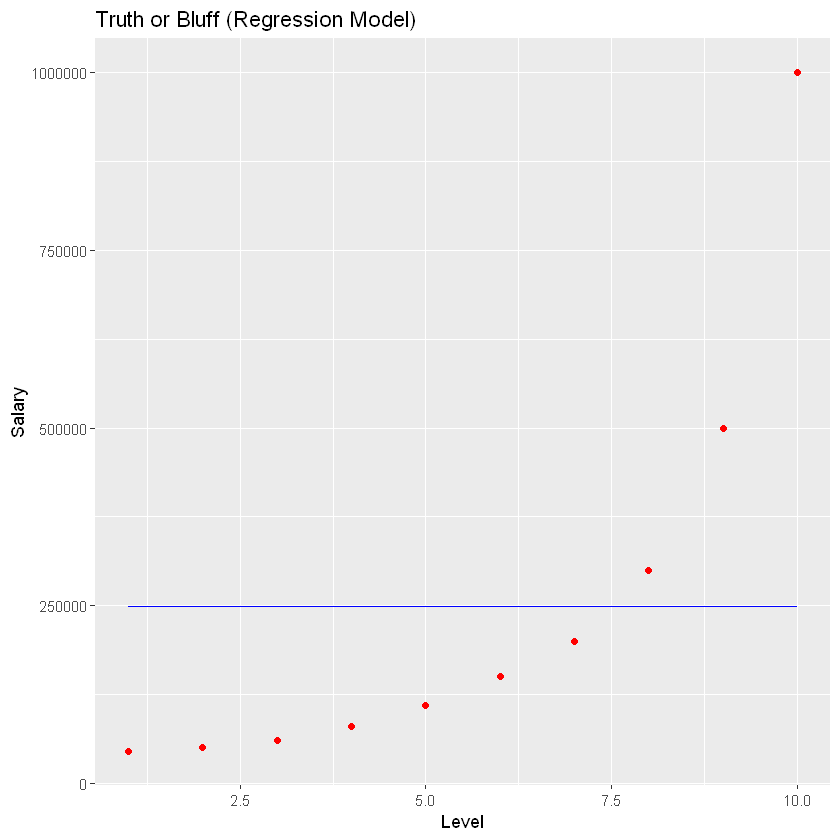

In [1]:
# Regression Template

# Importing the dataset
dataset = read.csv('Position_Salaries.csv')
dataset = dataset[2:3]

# Splitting the dataset into the Training set and Test set
# # install.packages('caTools')
# library(caTools)
# set.seed(123)
# split = sample.split(dataset$Salary, SplitRatio = 2/3)
# training_set = subset(dataset, split == TRUE)
# test_set = subset(dataset, split == FALSE)

# Feature Scaling
# training_set = scale(training_set)
# test_set = scale(test_set)

# Fitting the Regression Model to the dataset
library(rpart)
regressor <- rpart(Salary ~ Level,
                  dataset)

# Predicting a new result
y_pred = predict(regressor, data.frame(Level = 6.5))

# Visualising the Regression Model results
# install.packages('ggplot2')
library(ggplot2)
ggplot() +
  geom_point(aes(x = dataset$Level, y = dataset$Salary),
             colour = 'red') +
  geom_line(aes(x = dataset$Level, y = predict(regressor, newdata = dataset)),
            colour = 'blue') +
  ggtitle('Truth or Bluff (Decision Tree Regression Model)') +
  xlab('Level') +
  ylab('Salary')

# Visualising the Regression Model results (for higher resolution and smoother curve)
# install.packages('ggplot2')
library(ggplot2)
x_grid = seq(min(dataset$Level), max(dataset$Level), 0.1)
ggplot() +
  geom_point(aes(x = dataset$Level, y = dataset$Salary),
             colour = 'red') +
  geom_line(aes(x = x_grid, y = predict(regressor, newdata = data.frame(Level = x_grid))),
            colour = 'blue') +
  ggtitle('Truth or Bluff (Regression Model)') +
  xlab('Level') +
  ylab('Salary')

* Above model does not do a very good job of predicting.  
* Need to tune hyperparameters.  
* First we will update the control parameter.

In [2]:
regressor <- rpart(formula = Salary ~ .,
                  dataset,
                  control = rpart.control(minsplit = 1))

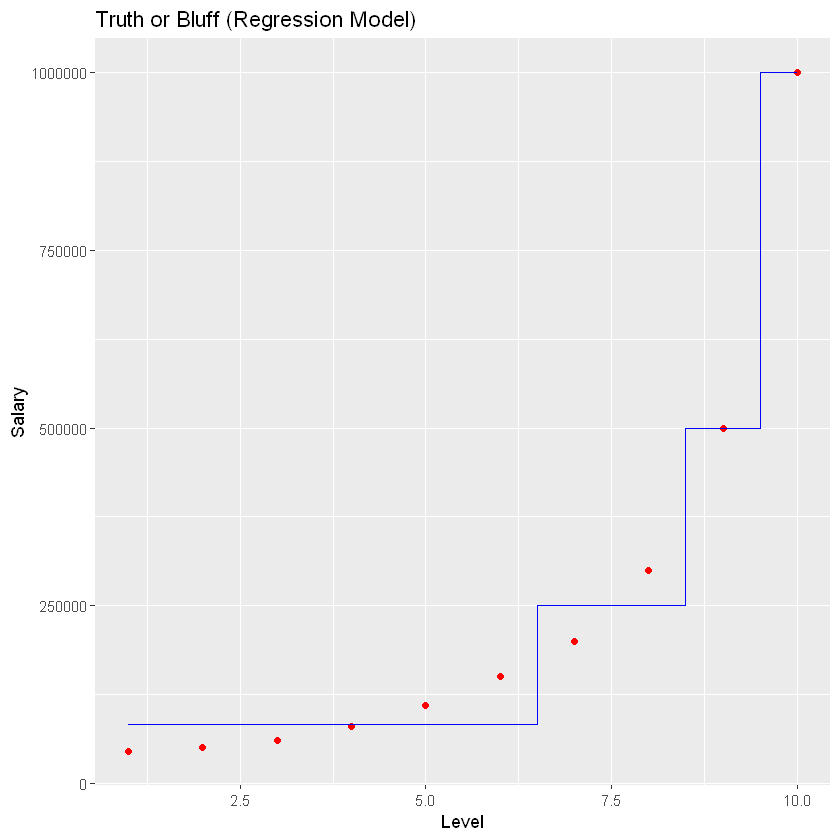

In [4]:
library(ggplot2)
x_grid = seq(min(dataset$Level), max(dataset$Level), 0.001)
ggplot() +
  geom_point(aes(x = dataset$Level, y = dataset$Salary),
             colour = 'red') +
  geom_line(aes(x = x_grid, y = predict(regressor, newdata = data.frame(Level = x_grid))),
            colour = 'blue') +
  ggtitle('Truth or Bluff (Regression Model)') +
  xlab('Level') +
  ylab('Salary')

* Note:  Above graph uses x_grid to get a robust model of predictions.  
* This gives you a truer shape of the model.  
* You can see there are 4 groups.  Each group is the average of the observations that fall within that level.  
* You should have a step function - would not be the case with just actuals.
* This would not matter with linear regression - depends on the algorithm.  
* Can update resolution in x_grid formula to really show verticality (I used .001 in this example).  